<a href="https://colab.research.google.com/github/drshahizan/Python-big-data/blob/main/Assignment%202b/Rojak/Group_Rojak_File_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Assignment: Alternatives to Pandas for Processing Large Datasets (Vaex)

###Group Members: 

<table>
  <tr>
    <th>Name</th>
    <th>Matric No</th>
  </tr>
  <tr>
    <th>Eddie Wong Chung Pheng </th>
    <th>A20EC0031</th>
  </tr>
  <tr>
    <th>Madihah Binti Che Zabri </th>
    <th>A20EC0074</th>
  </tr>
  <tr>
    <th>Nurarissa Dayana Binti Mohd Sukri</th>
    <th>A20EC0120</th>
  </tr>
  <tr> 
    <th>Vincent Boo Ee Khai</th>
    <th>A20EC0231</th>
  </tr>
</table>
<br></br>


## File 2: Comparison between Pandas and Vaex
Vaex is a python library for lazy Out-of-Core DataFrames (similar to Pandas), to visualize and explore big tabular datasets. It can calculate statistics such as mean, sum, count, standard deviation etc, on an N-dimensional grid up to a billion () objects/rows per second. Visualization is done using histograms, density plots and 3d volume rendering, allowing interactive exploration of big data. Vaex uses memory mapping, a zero memory copy policy, and lazy computations for best performance (no memory wasted).
<br></br>

**Dataset**

The dataset is obtained from Kaggle: <a href="https://www.kaggle.com/datasets/hhs/health-insurance-marketplace?select=Rate.csv">Rate.csv</a>  <br>
The size of the dataset is <b> 1.97 GB</b>.

#### Attribute Information:
| Acronym | Description |
| --- | --- |
| **BusinessYear** |   The year for which the rate information applies.  |
|**StateCode** |  The two-letter code for the state in which the health insurance plan is offered.  |
| **IssuerId** | A unique identifier for the insurer offering the health insurance plan. |
| **SourceName** |  The source of the rate information (e.g. the insurer, the state insurance department). |
| **VersionNum** | A version number for the rate information.  |
| **ImportDate** |  The date on which the rate information was imported into the Marketplace database.   |
| **IssuerId2** | A unique identifier for the insurer offering the health insurance plan.  |
| **FederalTIN** | Federal income taxes  |
| **RateEffectiveDate** |  The date for which the rate information is effective.   |
|**RateExpirationDate** |  The expire date for the rate. |
| **PlanId** | A unique identifier for the health insurance plan. |
| **RatingAreaId** | The age of the insured person for which the rate information applies.  |
| **Tobacco** | The rate information applies to tobacco users or non-tobacco users. |
| **Age** |   The age of the insured person for which the rate information applies.  |
| **IndividualRate** |  The monthly premium (cost) for the health insurance plan for an individual.  |
| **IndividualTobaccoRate** | The monthly premium for the health insurance plan for an individual tobacco user.  |
| **Couple** | The monthly premium for the health insurance plan for a couple.  |
|**PrimarySubscriberAndOneDependent** |  The primary subscriber for the health insurance plan and one dependent. |
| **PrimarySubscriberAndTwoDependents** | The primary subscriber for the health insurance plan and two dependent. |
| **CoupleAndOneDependent** | The monthly premium for the health insurance plan for a couple and one dependent. |
| **CoupleAndTwoDependents** | The monthly premium for the health insurance plan for a couple and two dependents.  |
| **CoupleAndThreeOrMoreDependents** |  The monthly premium for the health insurance plan for a couple and three or more dependents.   |
| **RowNumber** | The row number of rate information.  |


## **Installation and Downloading the Dataset**

**1) Install Vaex**

In [1]:
!pip install vaex

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.2/58.2 KB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 42.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.2/43.2 KB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.0/111.0 KB 5.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 28.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 238.1/238.1 KB 13.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.7/3.7 MB 53.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 510.3/510.3 KB 21.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 38.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 33.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 44.

**2) Import the Vaex Libraries**

In [2]:
import vaex as vx
import vaex.ml
import vaex.viz as vv
import pandas as pd 

**3) Download the dataset from Google Drive**

In [3]:
# Read dataset from google drive
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
link = 'https://drive.google.com/file/d/10PKFCHEW_B_4alRrDpjbA1WOsG2h4anZ/view?usp=share_link'
# to get the id part of the file
id = link.split("/")[-2]
 
downloaded = drive.CreateFile({'id':id})
downloaded.GetContentFile('Rate.csv') 
downloaded.GetContentFile('Network.csv') 

MessageError: ignored



---




# Comparison of Vaex and Pandas

**1) Reading Files**

In [ ]:
%time pd_df = pd.read_csv('Rate.csv')

CPU times: user 31.7 s, sys: 5.97 s, total: 37.6 s
Wall time: 40.3 s


In [ ]:
%time vaex_df = vx.open('Rate.csv') 

CPU times: user 2.24 s, sys: 484 ms, total: 2.72 s
Wall time: 2.73 s


Based on the comparison above, we can see that **vaex** took only ```3.06 s``` in reading the dataset compared to **pandas** 31.4 s in terms of ```CPU times```. **Vaex** is also much faster in reading the dataset than **pandas** in terms of ```wall time```.



**2) Reading Multi-file**

Data is frequently spread over multiple files, and you must open each one manually. This will give us troublesome and time-consuming.

In [ ]:
%time pd_df = pd.read_csv('Rate.csv')

CPU times: user 29.7 s, sys: 6.62 s, total: 36.3 s
Wall time: 36.4 s


In [ ]:
%time pd_df = pd.read_csv('Network.csv')

CPU times: user 31.3 s, sys: 6.54 s, total: 37.8 s
Wall time: 43.3 s


However, vaex offers the open many function, which can open a list of filenames and quickly concatenate them all into a single DataFrame.

In [ ]:
%time 
vaex_df_concat = vx.open_many(['Rate.csv', 'Network.csv'])

CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 7.63 µs


As a result, vaex can open two files in just ```microseconds``` while
pandas need ```minutes``` to open two files separately.

**3) Head (Vaex vs Pandas)**

In [ ]:
%time
head_pd = pd_df.head()

CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 8.58 µs


In [ ]:
%time
head_vaex = vaex_df.head()

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 8.11 µs


**4) Filtering Data**

In [ ]:
%time df_filtered = pd_df[pd_df['IndividualRate']>20]

CPU times: user 1.6 s, sys: 1.22 s, total: 2.83 s
Wall time: 2.83 s


In [ ]:
%time df_filtered=vaex_df[vaex_df['IndividualRate']>20]

CPU times: user 11.8 ms, sys: 3.88 ms, total: 15.7 ms
Wall time: 33.2 ms


As we filter the data, we can see that **vaex** reduced the time taken from ```milliseconds``` to ```seconds```.



**5) Statistic Performance**

In [ ]:
%time pd_df['IndividualRate'].mean()

CPU times: user 42.3 ms, sys: 607 µs, total: 42.9 ms
Wall time: 44.4 ms


4098.026458591218

In [ ]:
%time vaex_df['IndividualRate'].mean()

CPU times: user 8.66 s, sys: 1.44 s, total: 10.1 s
Wall time: 7.44 s


array(4098.02645858)

As we use mean to perform the statistic measures, we found out that **pandas** take shorter time to perform the task than **vaex**. 




**6) String Operations**

In [ ]:
%time pd_df['Tobacco'].str.lower()

CPU times: user 3.77 s, sys: 627 ms, total: 4.39 s
Wall time: 4.92 s


0           no preference
1           no preference
2           no preference
3           no preference
4           no preference
                ...      
12694440    no preference
12694441    no preference
12694442    no preference
12694443    no preference
12694444    no preference
Name: Tobacco, Length: 12694445, dtype: object

Vaex has a separate class for string functions vaex.expression.StringOperations. 


In [ ]:
%time vaex_df['Tobacco'].str.lower()

CPU times: user 1.2 ms, sys: 0 ns, total: 1.2 ms
Wall time: 1.21 ms


Expression = str_lower(Tobacco)
Length: 12,694,445 dtype: string (expression)
---------------------------------------------
       0  no preference
       1  no preference
       2  no preference
       3  no preference
       4  no preference
          ...          
12694440  no preference
12694441  no preference
12694442  no preference
12694443  no preference
12694444  no preference

Using vaex.expression.StringOperations can reduce the time taken to  execute the String Operations.

**7) GroupBy Function**

In [ ]:
%time pd_df.groupby('StateCode')['IndividualRate'].mean()

CPU times: user 814 ms, sys: 196 ms, total: 1.01 s
Wall time: 1.02 s


StateCode
AK     7024.934674
AL    12131.738408
AR    15069.197977
AZ     3976.503845
DE      359.123401
FL      311.205760
GA     6427.433659
HI      256.341476
IA      319.639549
ID    18457.376815
IL      372.445315
IN     4855.918482
KS    11346.758629
LA     8716.849950
ME      355.559184
MI     3052.602867
MO    12305.733324
MS    12977.019737
MT     5133.976639
NC     8206.358099
ND     7218.928421
NE     9155.720853
NH      351.429461
NJ      422.017152
NM    12148.574158
NV      299.121995
OH     3743.698566
OK     5157.578136
OR      277.150862
PA     3746.284228
SC     5681.339818
SD     9836.866162
TN     9608.466825
TX     5709.282772
UT     6710.920042
VA      319.326524
WI      477.037688
WV      347.902542
WY    12103.594558
Name: IndividualRate, dtype: float64

In [ ]:
%time vaex_df.groupby(by='StateCode').agg({'IndividualRate':'mean'})

CPU times: user 21.4 s, sys: 2.35 s, total: 23.8 s
Wall time: 13.4 s


#,StateCode,IndividualRate
0,NJ,422.017152475854
1,OK,5157.578136289506
2,SC,5681.339818376415
3,NE,9155.720852636192
4,IN,4855.9184819586535
...,...,...
34,AK,7024.934674098514
35,NC,8206.358099093733
36,ME,355.5591839399675
37,IL,372.44531510277506


## Comparisons (Vaex vs Pandas)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

function = ['Reading File', 'Reading Multi-file','Head', 'Filtering Data', 'Statistic Performance', 'String Operation', 'GroupBy']
compare = pd.DataFrame({'Pandas': [40.3, 36.4, 0.00000858, 2.83, 44.4, 4.92, 1.02], 'Vaex': [2.73, 43.3, 0.00000811, 0.0332, 7.44, 1.21, 13.4]}, index = function)
compare

,Pandas,Vaex
Reading File,40.300000,2.730000
Reading Multi-file,36.400000,43.300000
Head,0.000009,0.000008
Filtering Data,2.830000,0.033200
Statistic Performance,44.400000,7.440000
String Operation,4.920000,1.210000
GroupBy,1.020000,13.400000


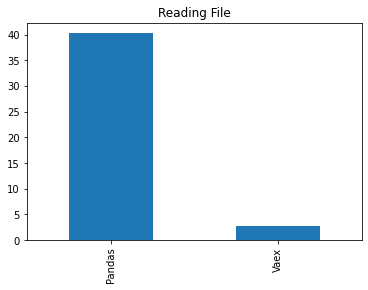

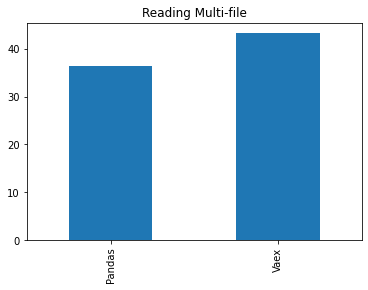

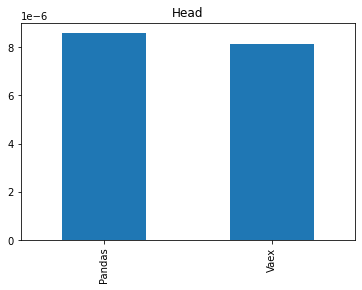

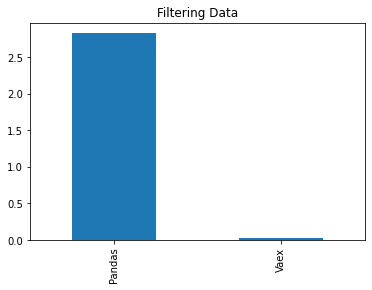

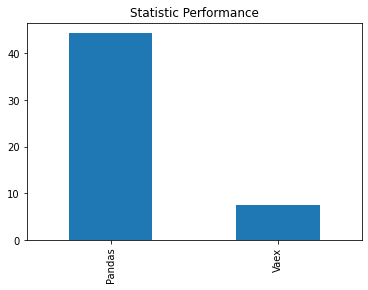

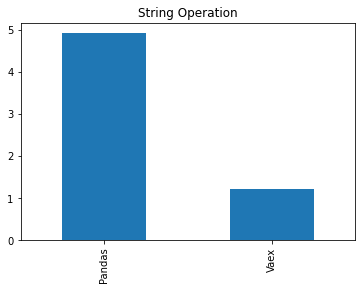

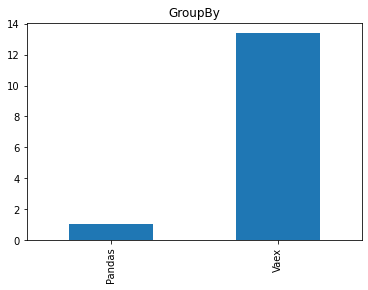

In [ ]:
for cpr in compare.index:
  compare.loc[cpr].plot(kind='bar', title=cpr)
  plt.show()

Based on the results that we had gotten in all the function test above, we can see that for reading file in Vaex is 2.73s and Pandas is 40.3s. Whereas, for multi-file reading in Vaex is 43.3s and Pandas is 36.4s.

The next part is about head for Vaex is 0.000008s vs Pandas is 0.000009s. For filtering data, Vaex got the result of 0.0332s and Pandas needed 2.83s. Then, Vaex needed only 7.44s for statistic performance but pandas needed 44.4s. 

Next is about string operation for Vaex is only 1.21s and Pandas needed 